   # **Perth House Price prediction project**

*In this notebook, I am glad to show you how to understand data and apply it to the Machine Learning model.
Also, I'll show how to visualize Latitude and Longitude on a map, how to deal with categorical data and deal with distributions in numerical data.
Then, I'll demonstrate how to work and test 7 ML models at a time and choose the best one. I hope you enjoy it!
Finally we can see the results and their accuracy is 84%.*

![](https://th.bing.com/th/id/OIP.yk4Bm3kehjEu3mTZewa1xQHaD4?w=341&h=180&c=7&r=0&o=5&pid=1.7)

# Overview

**1. First look at the DATA and simple EDA**

**2. Data Cleaning**

**3. Data Visualization(heatmap, histograms)**

**4. Visualizing Geographical Data (Visualizing how the price increase and decrease by location)**

**5. Creating new features based on the DATA. Experimenting with Attribute Combinations**

**6. Handling categorical and numerical data(creating preprocessor)**

**7. Models building and choosing the best model**

**8. Model Tuning**

**9. Results**

In [6]:
#importing libaries
import pandas as pd
import numpy as np

#data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#need to geografical data visualization(used in chapter 4)
from urllib.request import urlopen
import json

#need to deal with numerical and categorical data(used in chapter 6)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

pd.options.display.float_format = "{:.1f}".format
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. First look at the DATA and simple EDA

In [7]:
all_data = pd.read_csv('data/perth_house_info.csv')
all_data.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.1,115.8,LAKELAND SENIOR HIGH SCHOOL,0.8,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.2,115.9,ATWELL COLLEGE,5.5,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.1,116.0,KELMSCOTT SENIOR HIGH SCHOOL,1.6,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.9,116.0,SWAN VIEW SENIOR HIGH SCHOOL,1.6,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.9,115.9,KIARA COLLEGE,1.5,NaN


In [8]:
#create a func for in-depth data understanding

def EDA(data):

    shape_info = data.shape

    print('EXPLORATORY DATA ANALYSIS:\n')

    print(f'Numbers of rows: {shape_info[0]} \nNumbers of columns:  {shape_info[1]}\n',
    '\n------------------------------------------------------------------------------------\n')

    print(f'All columns from the dataframe :\n\n {data.columns}\n',
    '\n------------------------------------------------------------------------------------\n')

    print(f'Datatypes and Missing values:\n')
    print(data.info(),
    '\n------------------------------------------------------------------------------------\n')

    print('Summary statistics for the data :\n')
    print(data.describe(),
    '\n------------------------------------------------------------------------------------\n')

    print('MISSIN VALUES :\n')
    print(data.isnull().sum())
    
    
EDA(all_data)

EXPLORATORY DATA ANALYSIS:

Numbers of rows: 33656 
Numbers of columns:  19
 
------------------------------------------------------------------------------------

All columns from the dataframe :

 Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')
 
------------------------------------------------------------------------------------

Datatypes and Missing values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 

# 2. Data Cleaning

Handling with missing values(GARAGE, BUILD_YEAR, NEAREST_SCH_RANK)

1. Garage will be replaced by middle values(50%).

2. NEAREST_SCH_RANK column will be deleted from the dataset.

3. A 75% value will replace missing values from BUILD_YEAR.

In [9]:
#handling with missing values(GARAGE, BUILD_YEAR, NEAREST_SCH_RANK)
all_data['GARAGE'] = all_data['GARAGE'].fillna(all_data['GARAGE'].median())
all_data['BUILD_YEAR'] = all_data['BUILD_YEAR'].fillna(all_data['BUILD_YEAR'].quantile(0.75))
all_data = all_data.drop(['NEAREST_SCH_RANK'], axis=1)

all_data.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

 Handling with dtypes

1. GARAGE, BUILD_YEAR are float dtypes.

2. DATE_SOLD has extra character "/r" and object dtype.

In [10]:
#replace float dtype to int dtype in GARAGE and BUILD_YEAR
cols = ['GARAGE', 'BUILD_YEAR']
all_data[cols] = all_data[cols].applymap(np.int64)

#remove '\r' from DATE_SOLD values and formate it to datetime type
all_data['DATE_SOLD'] = all_data['DATE_SOLD'].str.replace('\r', '')
all_data['DATE_SOLD'] = pd.to_datetime(all_data['DATE_SOLD'])

all_data.dtypes

ADDRESS                     object
SUBURB                      object
PRICE                        int64
BEDROOMS                     int64
BATHROOMS                    int64
GARAGE                       int64
LAND_AREA                    int64
FLOOR_AREA                   int64
BUILD_YEAR                   int64
CBD_DIST                     int64
NEAREST_STN                 object
NEAREST_STN_DIST             int64
DATE_SOLD           datetime64[ns]
POSTCODE                     int64
LATITUDE                   float64
LONGITUDE                  float64
NEAREST_SCH                 object
NEAREST_SCH_DIST           float64
dtype: object

# 3. Data Visualization(heatmap, histograms)

Visualizing dataset:

1. Finding strong correlations

2. Visualizing histograms for all numerical columns

**1. Finding strong correlations**

In [11]:
num_cols = list(all_data.select_dtypes(['int64', 'float64']))
print('Numerical Cols: ', num_cols,'\n')

cat_cols = list(all_data.select_dtypes(['object', 'datetime64[ns]']))
print('Object Cols:', cat_cols)

Numerical Cols:  ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST'] 

Object Cols: ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH']


In [12]:
corr_matrix = all_data.corr()
print(corr_matrix['PRICE'].sort_values(ascending=False))

heat_map_fig = px.imshow(corr_matrix, template="seaborn")

heat_map_fig.update_layout(xaxis_rangeslider_visible=False, 
                      autosize=False, 
                      width=1150, 
                      height=700,
                      title={
                            'text': "Correlation of Numerical Variables"}
                    )

heat_map_fig.show()

PRICE               1.0
FLOOR_AREA          0.5
BATHROOMS           0.4
BEDROOMS            0.3
GARAGE              0.1
LAND_AREA           0.1
LATITUDE            0.1
NEAREST_SCH_DIST   -0.0
NEAREST_STN_DIST   -0.1
BUILD_YEAR         -0.1
POSTCODE           -0.2
LONGITUDE          -0.2
CBD_DIST           -0.4
Name: PRICE, dtype: float64


/var/folders/12/7k50dn215wv87vytmtwr239h0000gn/T/ipykernel_40252/363276187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = all_data.corr()


**Conclusions:**

1. Have corr with PRICE(>0.2): BATHROOMS, BEDROOMS, FLOOR_AREA

2. Have small corr(>=0.1): GARAGE, LAND_AREA, LATITUDE

3. No corr(<=0): NEAREST_SCH_DIST, NEAREST_STN_DIST, BUILD_YEAR, POSTCODE, LONGITUDE, CBD_DIST

**2. Visualizing histograms for all numerical columns**

array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDROOMS'}>,
        <AxesSubplot: title={'center': 'BATHROOMS'}>,
        <AxesSubplot: title={'center': 'GARAGE'}>],
       [<AxesSubplot: title={'center': 'LAND_AREA'}>,
        <AxesSubplot: title={'center': 'FLOOR_AREA'}>,
        <AxesSubplot: title={'center': 'BUILD_YEAR'}>,
        <AxesSubplot: title={'center': 'CBD_DIST'}>],
       [<AxesSubplot: title={'center': 'NEAREST_STN_DIST'}>,
        <AxesSubplot: title={'center': 'POSTCODE'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>],
       [<AxesSubplot: title={'center': 'NEAREST_SCH_DIST'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

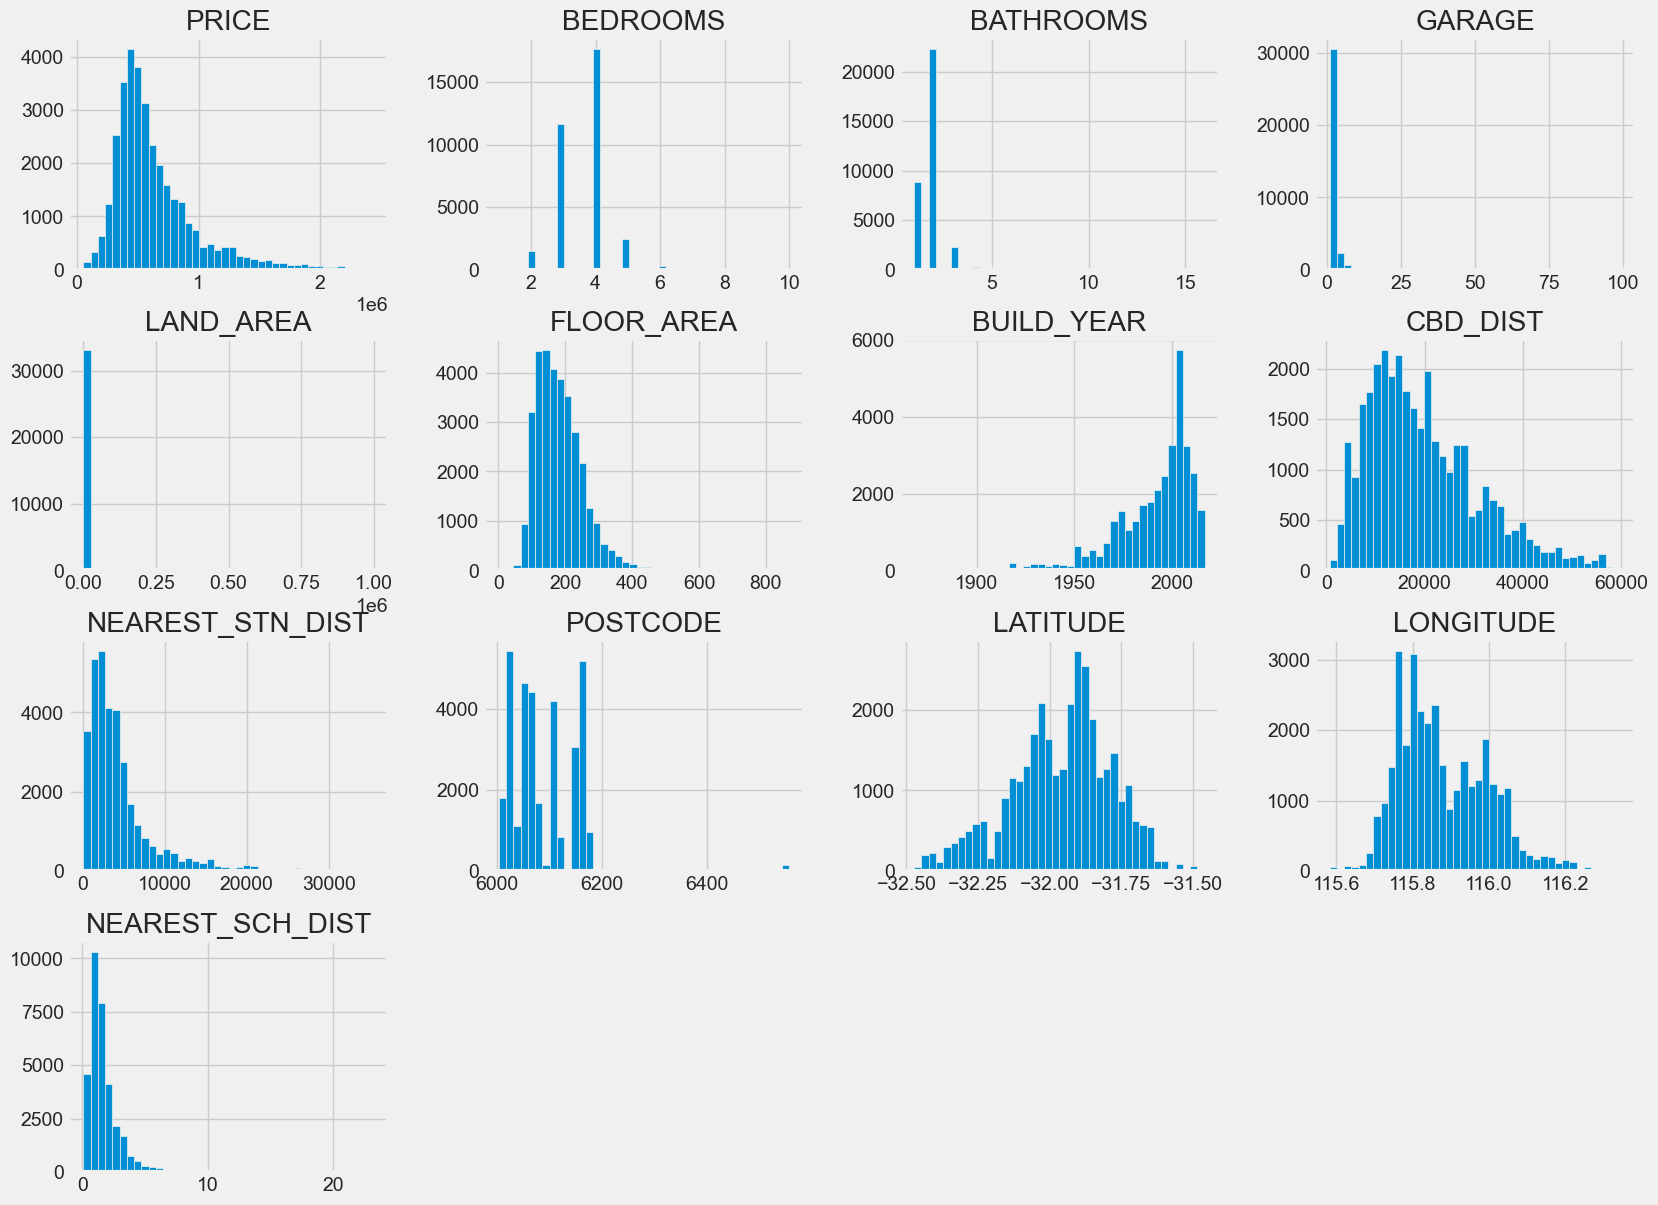

In [13]:
#visualize histograms for all numerial data
all_data[num_cols].hist(bins=40, figsize=(18,14))

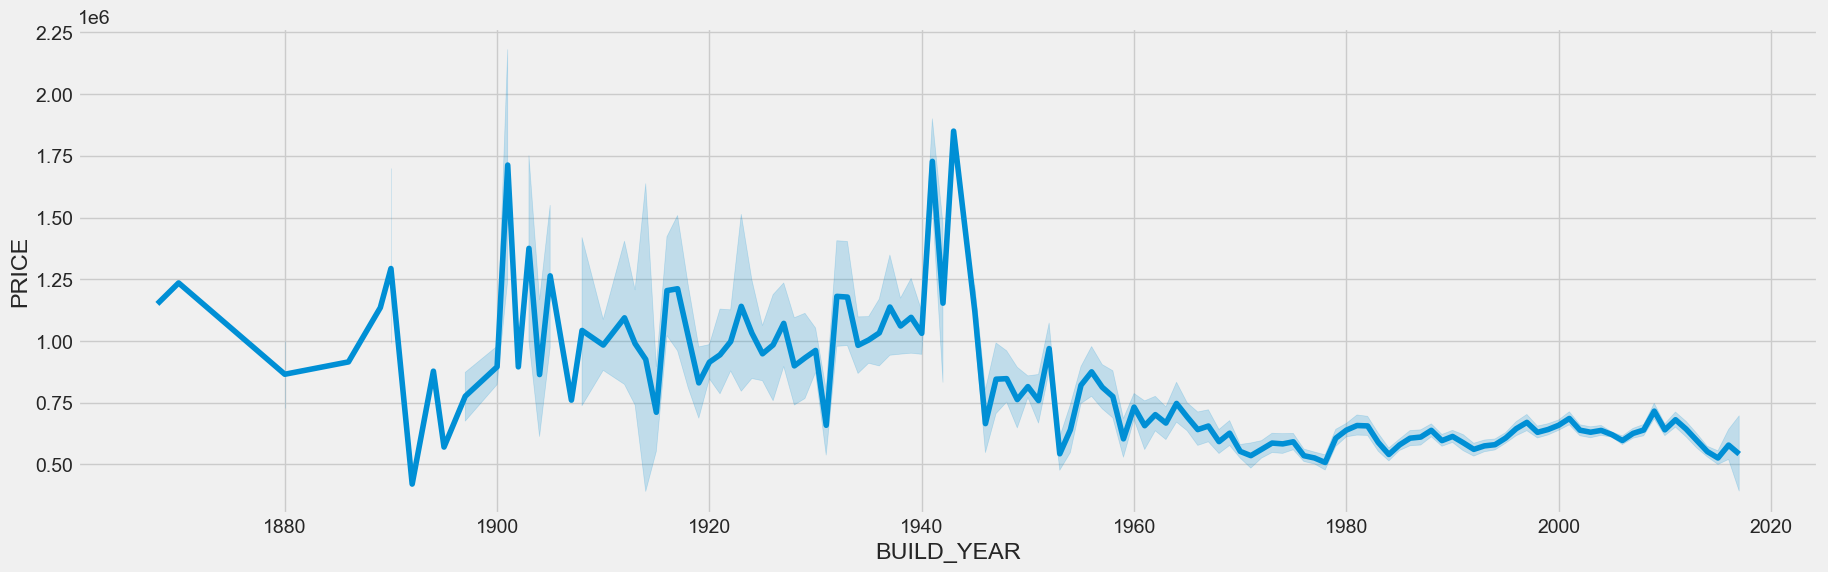

In [14]:
#visualize how PRICE responds to BUILD_YEAR.
plt.figure(figsize=(20,6))
fig = sns.lineplot(x=all_data['BUILD_YEAR'], y=all_data['PRICE'])

**Conclusions:**

1. PRICE, BUILD_YEAR, NEAREST_STN_DIST, NEAREST_SCH_DIST and CBD_DIST have poor distributions.

2. Many attributes have very different scales.

3. PRICE above $1.5 mln, LAND_AREA above 1500, BUILD_YEAR below 1950, NEAREST_STN_DIST above 10000 and NEAREST_SCH_DIST above 4 will be deleted.

In [15]:
#remove rows where price is above 1.5$ mln

sum_before = all_data['ADDRESS'].count() 

all_data.drop(all_data[all_data['PRICE'] > 1500000].index, inplace=True)

#remove rows where LAND_AREA > 1500, BUILD_YEAR < 1950, NEAREST_STN_DIST > 10000, NEAREST_SCH_DIST > 4
all_data.drop(all_data[all_data['LAND_AREA'] > 1500].index, inplace=True)

all_data.drop(all_data[all_data['BUILD_YEAR'] < 1950].index, inplace=True)

all_data.drop(all_data[all_data['NEAREST_STN_DIST'] > 10000].index, inplace=True)

all_data.drop(all_data[all_data['NEAREST_SCH_DIST'] > 4].index, inplace=True)

#remove rows where year is NaN
all_data.dropna(inplace=True)

sum_after = all_data['ADDRESS'].count()

def percentage_of_deleted_rows(sum_before, sum_after):

    del_rows = sum_before - sum_after

    all_rows = 100
    percentage = (all_rows * sum_after) / sum_before
    
    del_per = float('{:.1f}'.format(all_rows - percentage))

    print(f'Sum of rows before deletion: {sum_before}\nSum of rows after deletion: {sum_after}')
    print(f'Deleted rows: {del_rows}\n')
    print(f'Percentage of deleted rows: {del_per}%')
    

percentage_of_deleted_rows(sum_before, sum_after)

Sum of rows before deletion: 33656
Sum of rows after deletion: 25034
Deleted rows: 8622

Percentage of deleted rows: 25.6%


array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDROOMS'}>,
        <AxesSubplot: title={'center': 'BATHROOMS'}>,
        <AxesSubplot: title={'center': 'GARAGE'}>],
       [<AxesSubplot: title={'center': 'LAND_AREA'}>,
        <AxesSubplot: title={'center': 'FLOOR_AREA'}>,
        <AxesSubplot: title={'center': 'BUILD_YEAR'}>,
        <AxesSubplot: title={'center': 'CBD_DIST'}>],
       [<AxesSubplot: title={'center': 'NEAREST_STN_DIST'}>,
        <AxesSubplot: title={'center': 'POSTCODE'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>],
       [<AxesSubplot: title={'center': 'NEAREST_SCH_DIST'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

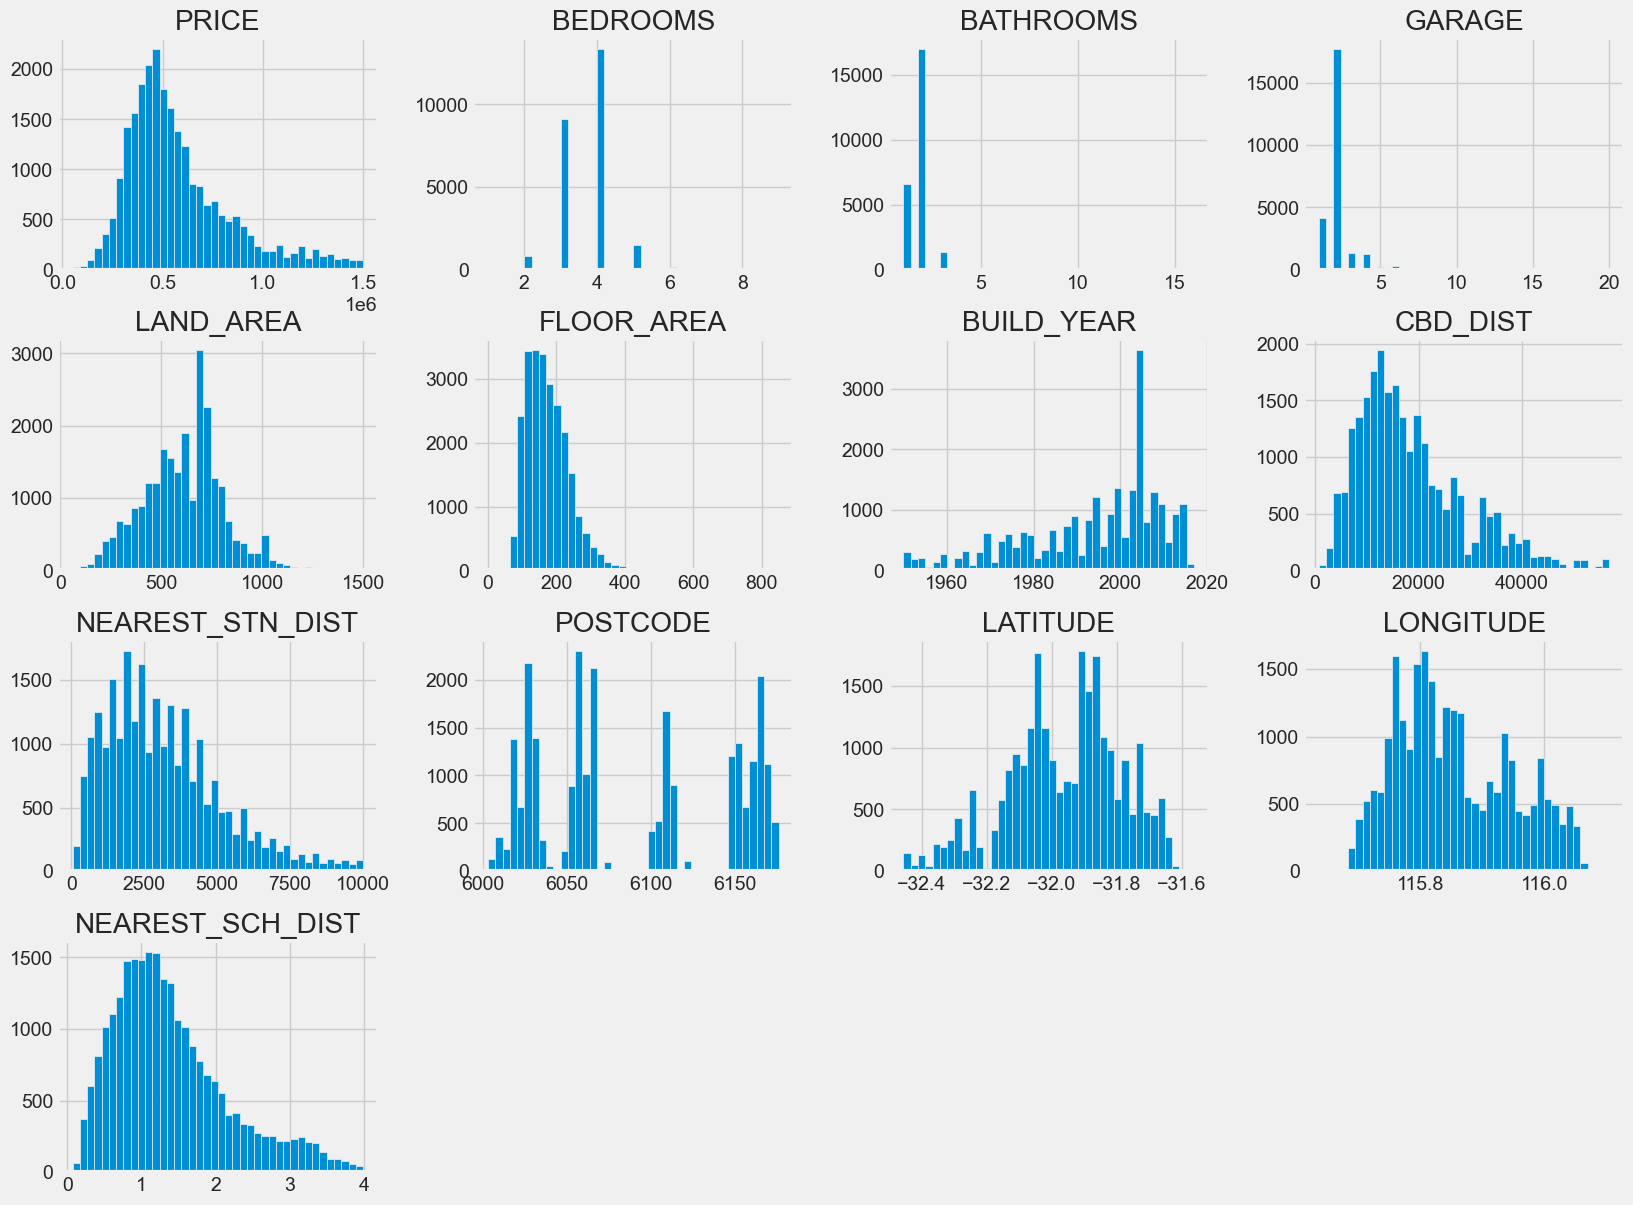

In [16]:
all_data[num_cols].hist(bins=40, figsize=(18,14))

# 4. Visualizing Geographical Data (Visualizing how the price increase and decrease by location)


In [17]:
#from urllib.request import urlopen
#import json

with urlopen('https://raw.githubusercontent.com/tonywr71/GeoJson-Data/master/australian-states.json') as response:
    australia = json.load(response)

info = geo_df = all_data[['LATITUDE', 'LONGITUDE', 'PRICE', 'ADDRESS', 'BUILD_YEAR']]

fig = px.scatter_mapbox(info, lat='LATITUDE', lon='LONGITUDE', hover_name='ADDRESS', 
    hover_data=['BUILD_YEAR'], color='PRICE',
    zoom=8, height=500, width=1150)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":1,"b":1})
fig.show()

**Summary:**

1. Homes with prices above $0.8 million are situated close to the ocean and in the centre of Perth

2. Houses under $0.4 million are located closer to the right side of town or, in general, outside of Perth center

3. Price is affected by the population density

# 5. Creating new features based on the DATA. Experimenting with Attribute Combinations

In [18]:
all_data['FREE_AREA'] = all_data['LAND_AREA'] - all_data['FLOOR_AREA']

all_data['OTHERS_ROOMS_AREA'] = all_data['FLOOR_AREA'] * 0.25

all_data['GARAGE_AREA'] = (all_data['FLOOR_AREA'] - all_data['OTHERS_ROOMS_AREA']) / (all_data['BEDROOMS'] + all_data['BATHROOMS'])
all_data['BATHROOMS_AREA'] = (all_data['FLOOR_AREA'] - all_data['OTHERS_ROOMS_AREA']) / (all_data['BEDROOMS'] + all_data['GARAGE'])
all_data['BEDROOMS_AREA'] = (all_data['FLOOR_AREA'] - all_data['OTHERS_ROOMS_AREA']) / (all_data['BATHROOMS'] + all_data['GARAGE'])

all_data.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,FREE_AREA,OTHERS_ROOMS_AREA,GARAGE_AREA,BATHROOMS_AREA,BEDROOMS_AREA
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18300,...,6164,-32.1,115.8,LAKELAND SENIOR HIGH SCHOOL,0.8,440,40.0,20.0,20.0,30.0
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22600,...,6111,-32.1,116.0,KELMSCOTT SENIOR HIGH SCHOOL,1.6,633,21.5,16.1,16.1,32.2
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17900,...,6056,-31.9,116.0,SWAN VIEW SENIOR HIGH SCHOOL,1.6,592,14.8,14.8,11.1,14.8
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11200,...,6054,-31.9,115.9,KIARA COLLEGE,1.5,335,32.8,19.6,16.4,32.8
5,1 Amethyst Crescent,Mount Richon,409000,4,2,1,759,118,1991,27300,...,6112,-32.2,116.0,ARMADALE SENIOR HIGH SCHOOL,1.2,641,29.5,14.8,17.7,29.5


In [19]:
#Check how new lebels correlete with PRICE
corr_matrix = all_data.corr()
corr_matrix['PRICE'].sort_values(ascending=False)

/var/folders/12/7k50dn215wv87vytmtwr239h0000gn/T/ipykernel_40252/3238953962.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



PRICE                1.0
OTHERS_ROOMS_AREA    0.6
FLOOR_AREA           0.6
BATHROOMS_AREA       0.5
GARAGE_AREA          0.5
BATHROOMS            0.4
BEDROOMS_AREA        0.3
BEDROOMS             0.2
GARAGE               0.1
LATITUDE             0.1
LAND_AREA            0.1
BUILD_YEAR          -0.0
NEAREST_SCH_DIST    -0.1
FREE_AREA           -0.1
NEAREST_STN_DIST    -0.1
POSTCODE            -0.2
LONGITUDE           -0.3
CBD_DIST            -0.4
Name: PRICE, dtype: float64

**CONCLUSIONS:**

1. Lebels that have good correlation are added to the data set (OTHERS_ROOMS_AREA, BATHROOMS_AREA, GARAGE_AREA, BEDROOMS_AREA)

2. Lebels that have corr < 1 will be deleted

In [20]:
data = all_data.drop(['FREE_AREA', 'BUILD_YEAR', 'NEAREST_SCH_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LONGITUDE', 'CBD_DIST'], axis=1)
#data.to_csv('Perth_data_with_given_labels.csv', index=False)

# 6. Handling categorical and numerical data(creating preprocessor)

In [21]:
y = data['PRICE']
features = data.drop(['ADDRESS', 'DATE_SOLD', 'PRICE'], axis=1)

num_cols = list(features.select_dtypes(['int64', 'float64']))
print('Numerical Cols: ', num_cols,'\n')

cat_cols = list(features.select_dtypes('object'))
print('Object Cols:', cat_cols)

Numerical Cols:  ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'LATITUDE', 'OTHERS_ROOMS_AREA', 'GARAGE_AREA', 'BATHROOMS_AREA', 'BEDROOMS_AREA'] 

Object Cols: ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH']


**Creating Preprocessor**

In [22]:
#numerical_transformer = SimpleImputer(strategy='constant')
numerical_transformer = MinMaxScaler(feature_range=(0,1))
"""
used to test 

categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
"""
"""
used to test 

categorical_transformer = Pipeline(steps=[
    ('count_encoder', ce.CountEncoder())
])
"""
#The best way to encode categorical data is to use CatBoostEncoder
categorical_transformer = Pipeline(steps=[
    ('cat_encoder', ce.CatBoostEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

NameError: name 'ce' is not defined

# 7. Models building and choosing the best model

In [ ]:
#spliting data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=21)

In [ ]:
models = {
    'RandomForestRegressor' :RandomForestRegressor(),
    'BayesianRidge' :BayesianRidge(),
    'ElasticNet' :ElasticNet(),
    'Ridge' :Ridge(), 
    'XGBRegressor' :XGBRegressor(),
    'SVR' :SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

mae_results = []
r2_results = []
model_names = []

for name, model in models.items():

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mae_score = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    mae_results.append(mae_score)
    r2_results.append(r2)
    model_names.append(name)

results = pd.DataFrame([model_names, mae_results, r2_results])
results = results.transpose()
results = results.rename(columns={0:'Model',1:'MAE', 2:'R2 Score'}).sort_values(by='R2 Score',ascending=False)
results

,Model,MAE,R2 Score
0,RandomForestRegressor,70519.1,0.8
4,XGBRegressor,71776.1,0.8
3,Ridge,80596.0,0.8
2,ElasticNet,102062.2,0.7
1,BayesianRidge,103509.9,0.7
6,DecisionTreeRegressor,100658.7,0.7
5,SVR,191927.6,-0.0


**The best performance shows RandomForestRegression**

# 8. Model Tuning

**RandomForestRegression**

In [ ]:
final_model = RandomForestRegressor(n_estimators=400, max_features=8, max_depth=16)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)])

final_pipeline.fit(X_train, y_train)
final_preds = final_pipeline.predict(X_test)

model_results = pd.DataFrame([y_test.values, final_preds])
model_results = model_results.transpose()
model_results = model_results.rename(columns={0:'Actual Price',1:'Predicted Price'})

print(model_results.describe(),'\n')
print("MAE:", round(mean_absolute_error(model_results['Actual Price'], model_results['Predicted Price']), 1),'\n')
print("R2 score:", round(r2_score(model_results['Actual Price'], model_results['Predicted Price']), 2))

       Actual Price  Predicted Price
count        5007.0           5007.0
mean       576041.7         580523.4
std        264799.5         246220.1
min         61000.0         167062.9
25%        397500.0         401780.6
50%        510000.0         514407.1
75%        695000.0         698080.5
max       1500000.0        1366600.3 

MAE: 69562.0 

R2 score: 0.85


In [ ]:
final_model_scores = cross_val_score(final_pipeline, X_train, y_train,
                              cv=5,
                              scoring='r2')

print(f'Mean R2 scores: {round(np.mean(final_model_scores), 2)}')

Mean R2 scores: 0.84


# 9. Results

array([[<AxesSubplot:title={'center':'Actual Price'}>,
        <AxesSubplot:title={'center':'Predicted Price'}>]], dtype=object)

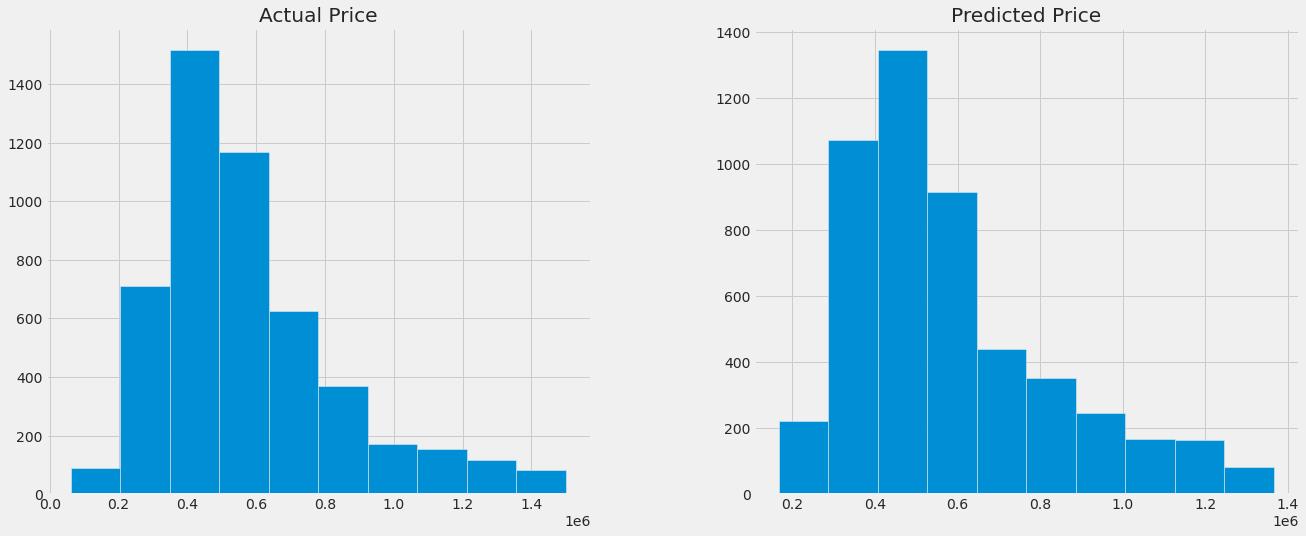

In [ ]:
model_results.hist(figsize=(20, 8))

                                                            I HOPE YOU ENJOY MY WORK!!!
                                                            
                                                 P.S Please leave comments on how to improve the notebook)